# Telecom Churn Prediction - Notebook


The goal of this notebook is to provide an overview of how write a notebook and create a submission file that successfully solves the churn prediction problem. Please download the datasets, unzip and place them in the same folder as this notebook.

We are going to follow the process called CRISP-DM.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" style="height: 400px; width:400px;"/>

After Business and Data Understanding via EDA, we want to prepare data for modelling. Then evaluate and submit our predictions.

#  Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

In [274]:
import sys

# Check the Python version
print(sys.version)

# Print the current working directory
import os
print(os.getcwd())


3.12.7 (main, Oct  1 2024, 02:05:46) [Clang 15.0.0 (clang-1500.3.9.4)]
/Volumes/sanket/telecom/telecom


In [273]:
import pandas as pd

# Load and display the first few rows 
file_path = '/Volumes/sanket/telecom/telecom/data/data_dictionary.csv'
data_dictionary = pd.read_csv(file_path)

data_dictionary.head()


,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls


In [25]:
import os
import pandas as pd

class TelecomChurnPredictor:
    def __init__(self):
        self.data = None

    def load_data(self, filepath):
        """Load the data from a CSV file."""
        print(f"Loading data from {filepath}...")
        self.data = pd.read_csv(filepath)
        return self

    def preprocess_data(self):
        """Preprocess the loaded data."""
        print("Preprocessing data...")
        # Add preprocessing steps here
        return self

    def prepare_features(self):
        """Prepare features for the model."""
        print("Preparing features...")
        # Add feature engineering steps here
        return self

    def train_model(self):
        """Train the machine learning model."""
        print("Training model...")
        # Add model training steps here
        return self

    def evaluate_model(self):
        """Evaluate the model."""
        print("Evaluating model...")
        # Add evaluation steps here
        return self

    def feature_importance_analysis(self):
        """Analyze feature importance."""
        print("Analyzing feature importance...")
        # Add feature importance analysis here
        return self

if __name__ == "__main__":
    # Initialize the predictor
    predictor = TelecomChurnPredictor()
    
    # Define the file path
    filepath = '/Users/sanket/Downloads/data_dictionary.csv'
    
    # Check if the file exists
    if not os.path.exists(filepath):
        print(f"Error: File '{filepath}' does not exist.")
    else:
        try:
            # Run the pipeline
            (predictor
             .load_data(filepath)
             .preprocess_data()
             .prepare_features()
             .train_model()
             .evaluate_model()
             .feature_importance_analysis())
            
            # Check if 'churn_probability' exists
            if 'churn_probability' not in predictor.data.columns:
                print("Error: Key 'churn_probability' not found in the dataframe.")
        except Exception as e:
            print(f"An error occurred: {e}")


Loading data from /Users/sanket/Downloads/data_dictionary.csv...
Preprocessing data...
Preparing features...
Training model...
Evaluating model...
Analyzing feature importance...
Error: Key 'churn_probability' not found in the dataframe.


In [276]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

data = pd.read_csv("/Users/sanket/Downloads/train.csv")
unseen = pd.read_csv("/Users/sanket/Downloads/test.csv")
sample = pd.read_csv("/Users/sanket/Downloads/sample.csv")
data_dict = pd.read_csv("/Users/sanket/Downloads/data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [277]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [278]:
ids = ['id','circle_id']
total_amounts = [i for i in list(data.columns) if re.search('total.+amt',i)]
total_outgoing_minutes = [i for i in list(data.columns) if re.search('total.+og.+mou',i)]
offnetwork_minutes = [i for i in list(data.columns) if re.search('offnet',i)]
average_revenue_3g = [i for i in list(data.columns) if re.search('arpu.+3g',i)]
average_revenue_2g = [i for i in list(data.columns) if re.search('arpu.+2g',i)]
volume_3g = [i for i in list(data.columns) if re.search('vol.+3g',i)]
volume_2g = [i for i in list(data.columns) if re.search('vol.+2g',i)]
age_on_network = [i for i in list(data.columns) if re.search('aon',i)]

#Storing them in a single flat list
variables = [*ids, 
             *total_amounts, 
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             'churn_probability']

data = data[variables].set_index('id')

In [279]:
data.head()

,circle_id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,109,77,65,10,81.21,221.68,3.63,32.24,96.68,2.33,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,1958,0
1,109,0,145,50,0.00,30.73,31.66,0.00,25.99,30.89,...,122.08,NaN,0.0,3.96,0.0,0.0,352.91,0.00,710,0
2,109,70,120,0,56.49,99.36,0.00,53.99,82.05,0.00,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,882,0
3,109,160,240,130,76.03,95.98,53.84,68.76,78.48,50.23,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,982,0
4,109,290,136,122,63.26,42.94,15.76,56.99,38.11,9.63,...,35.12,0.0,0.0,0.00,0.0,390.8,308.89,213.47,647,0


In [280]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69998
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   circle_id          69999 non-null  int64  
 1   total_rech_amt_6   69999 non-null  int64  
 2   total_rech_amt_7   69999 non-null  int64  
 3   total_rech_amt_8   69999 non-null  int64  
 4   total_og_mou_6     69999 non-null  float64
 5   total_og_mou_7     69999 non-null  float64
 6   total_og_mou_8     69999 non-null  float64
 7   offnet_mou_6       67231 non-null  float64
 8   offnet_mou_7       67312 non-null  float64
 9   offnet_mou_8       66296 non-null  float64
 10  arpu_3g_6          17568 non-null  float64
 11  arpu_3g_7          17865 non-null  float64
 12  arpu_3g_8          18417 non-null  float64
 13  arpu_2g_6          17568 non-null  float64
 14  arpu_2g_7          17865 non-null  float64
 15  arpu_2g_8          18417 non-null  float64
 16  vol_3g_mb_6        69999 no

In [281]:
data.describe(include="all")

,circle_id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,churn_probability
count,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,...,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,109.0,328.139788,322.376363,323.846355,306.451436,310.572674,304.513065,198.874771,197.153383,196.543577,...,85.846074,86.348404,122.171882,128.934444,135.486541,51.773924,51.240204,50.127506,1220.639709,0.101887
std,0.0,404.211068,411.070120,426.181405,465.502866,479.131770,477.936832,316.818355,322.482226,324.089234,...,178.067280,170.297094,554.869965,554.096072,568.310234,212.513909,211.114667,213.101403,952.426321,0.302502
min,109.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-13.090000,-55.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000
25%,109.0,110.000000,100.000000,90.000000,44.780000,42.910000,38.710000,34.860000,32.240000,31.575000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000
50%,109.0,229.000000,220.000000,225.000000,145.280000,141.230000,138.360000,96.480000,91.885000,91.800000,...,8.800000,9.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000
75%,109.0,438.000000,430.000000,436.000000,374.305000,380.045000,370.895000,232.990000,227.630000,229.345000,...,122.070000,122.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000
max,109.0,35190.000000,40335.000000,45320.000000,10674.030000,8285.640000,14043.060000,8362.360000,7043.980000,14007.340000,...,4809.360000,3483.170000,45735.400000,28144.120000,30036.060000,10285.900000,7873.550000,11117.610000,4337.000000,1.000000


Training dataset loaded with shape: (69999, 172)
Test dataset loaded with shape: (30000, 171)


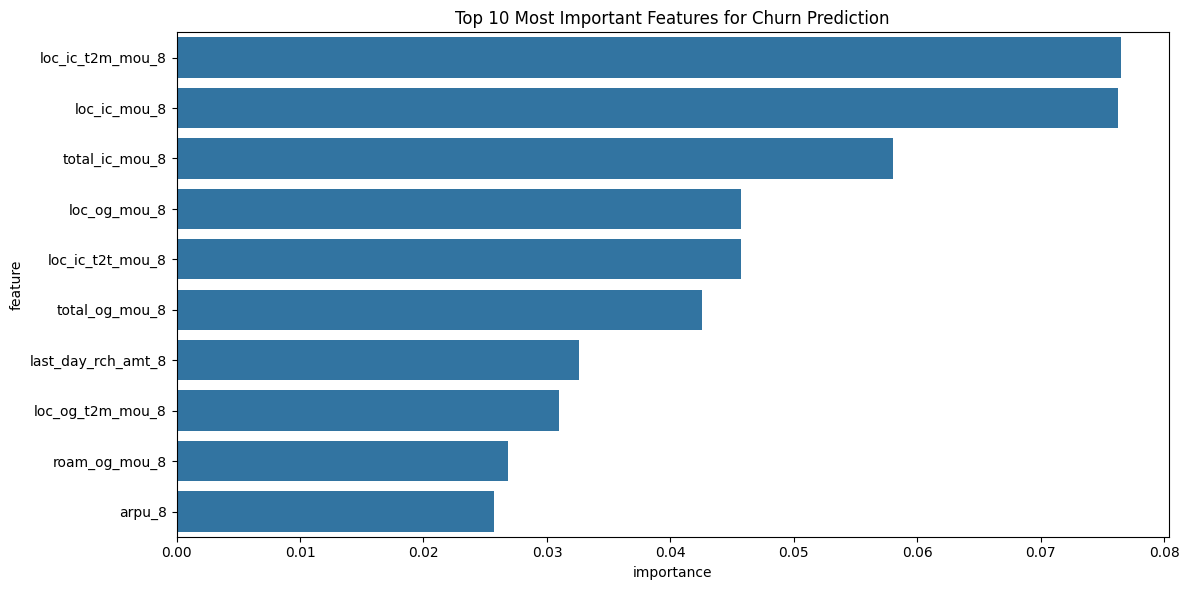

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

class TelecomChurnPredictor:
    def __init__(self):
        """Initialize the TelecomChurnPredictor with necessary attributes"""
        self.train_data = None
        self.test_data = None
        self.X_train = None
        self.y_train = None
        self.model = None
        self.scaler = StandardScaler()
        self.feature_columns = None
    
    def load_data(self, train_filepath, test_filepath=None):
        """
        Load the telecom datasets
        
        Parameters:
        train_filepath (str): Path to the training dataset file
        test_filepath (str): Path to the test dataset file (optional)
        """
        self.train_data = pd.read_csv(train_filepath)
        print(f"Training dataset loaded with shape: {self.train_data.shape}")
        
        if test_filepath:
            self.test_data = pd.read_csv(test_filepath)
            print(f"Test dataset loaded with shape: {self.test_data.shape}")
        
        return self

    def preprocess_data(self):
        """
        Preprocess the data including handling missing values and feature engineering
        """
        # Handle missing values in training data
        self.train_data = self.train_data.fillna(0)
        
        # Create derived features for training data
        self._create_derived_features(self.train_data)
        
        # If test data exists, apply the same preprocessing
        if self.test_data is not None:
            self.test_data = self.test_data.fillna(0)
            self._create_derived_features(self.test_data)
        
        return self
    
    def _create_derived_features(self, dataset):
        """
        Helper method to create derived features for a dataset
        
        Parameters:
        dataset (pd.DataFrame): Dataset to process
        """
        # Total usage features
        dataset['total_calls'] = dataset.filter(like='_NUM').sum(axis=1)
        dataset['total_amount'] = dataset.filter(like='_AMT').sum(axis=1)
        
        # Network usage patterns
        onnet_sum = dataset.filter(like='ONNET').sum(axis=1)
        dataset['offnet_to_onnet_ratio'] = dataset.filter(like='OFFNET').sum(axis=1) / (onnet_sum + 1)
        
        # Revenue-related features
        if 'ARPU' in dataset.columns:
            dataset['revenue_risk'] = dataset['ARPU'].rolling(window=3, min_periods=1).mean()
        
        # Service usage intensity
        data_cols = dataset.filter(like='DATA').columns
        if len(data_cols) > 0:
            dataset['total_data_usage'] = dataset[data_cols].sum(axis=1)

    def prepare_features(self, target_column='churn_probability'):
        """
        Prepare features for modeling
        
        Parameters:
        target_column (str): Name of the target variable column
        """
        # Remove non-feature columns
        columns_to_drop = ['CIRCLE_ID'] if 'CIRCLE_ID' in self.train_data.columns else []
        
        # Prepare training features
        if target_column in self.train_data.columns:
            self.y_train = self.train_data[target_column]
            columns_to_drop.append(target_column)
        else:
            raise KeyError(f"Target column '{target_column}' not found in the training data!")
        
        X_train = self.train_data.drop(columns=columns_to_drop)
        
        # Select only numeric columns for scaling
        X_train = X_train.select_dtypes(include=[np.number])  # Keep only numeric columns
        
        self.feature_columns = X_train.columns  # Store feature columns for later use
        self.X_train = self.scaler.fit_transform(X_train)
        
        return self
    
    def train_model(self):
        """Train the Random Forest model with optimized parameters"""
        self.model = RandomForestClassifier(
            n_estimators=200,  # Increased number of trees
            max_depth=15,      # Increased depth
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            class_weight='balanced'  # Handle class imbalance
        )
        self.model.fit(self.X_train, self.y_train)
        return self
    
    def predict(self):
        """
        Make predictions on the test data
        
        Returns:
        np.array: Predicted probabilities of churn
        """
        if self.test_data is None:
            raise ValueError("No test data available for prediction!")
        
        # Prepare test features using the same columns as training
        X_test = self.test_data[self.feature_columns]
        
        # Select only numeric columns for scaling in the test set
        X_test = X_test.select_dtypes(include=[np.number])  # Keep only numeric columns
        
        X_test_scaled = self.scaler.transform(X_test)
        
        # Return both class predictions and probabilities
        predictions = self.model.predict(X_test_scaled)
        probabilities = self.model.predict_proba(X_test_scaled)[:, 1]
        
        # Create a results DataFrame
        results = pd.DataFrame({
            'predicted_churn': predictions,
            'churn_probability': probabilities
        })
        
        return results
    
    def feature_importance_analysis(self):
        """Analyze and visualize feature importance"""
        feature_importance = pd.DataFrame({
            'feature': self.feature_columns,
            'importance': self.model.feature_importances_
        })
        feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x='importance', y='feature', data=feature_importance)
        plt.title('Top 10 Most Important Features for Churn Prediction')
        plt.tight_layout()
        plt.show()
        return self

# Example usage
if __name__ == "__main__":
    # Filepaths for the datasets
    train_filepath = '/Users/sanket/Downloads/train.csv'
    test_filepath = '/Users/sanket/Downloads/test.csv'
    
    # Initialize and run the predictor
    predictor = TelecomChurnPredictor()
    
    # Train the model
    (predictor
        .load_data(train_filepath, test_filepath)
        .preprocess_data()
        .prepare_features()
        .train_model()
    )
    
    # Make predictions on test data
    predictions = predictor.predict()
    
    # Save predictions to CSV
    predictions.to_csv('churn_predictions.csv', index=False)
    
    # Analyze feature importance
    predictor.feature_importance_analysis()


<Axes: >

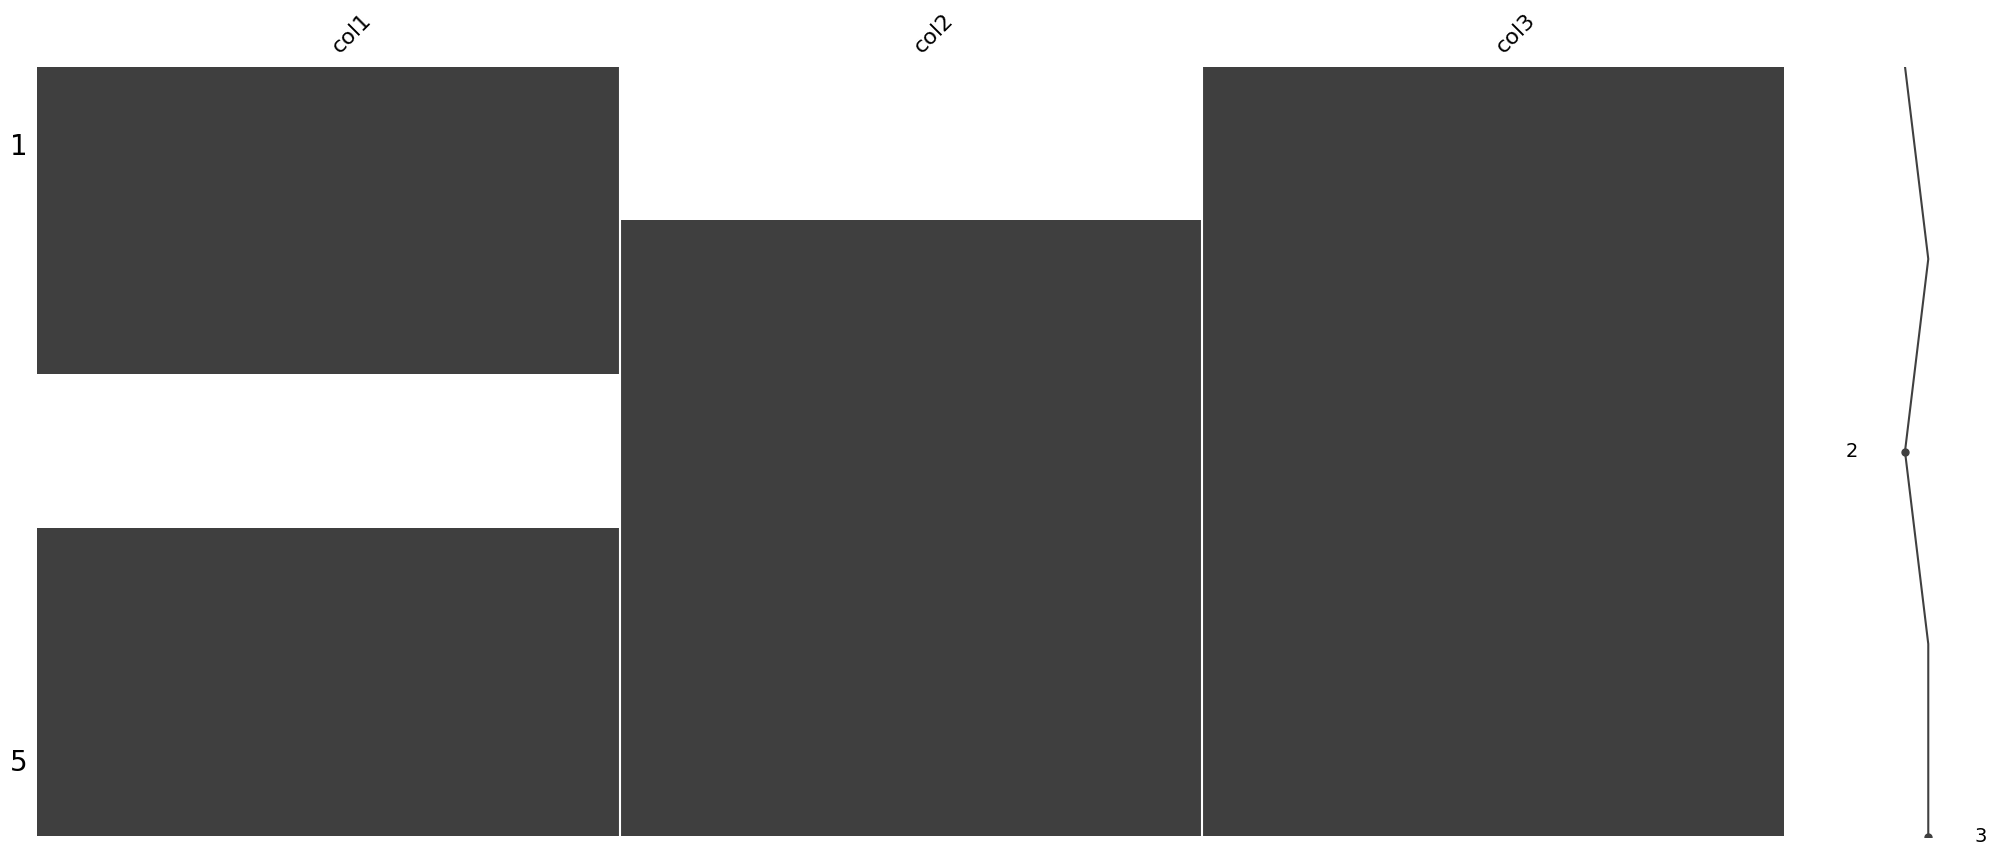

In [54]:
import missingno as msno
import pandas as pd
import numpy as np

# Create a DataFrame with missing values
df = pd.DataFrame({
    'col1': [1, 2, np.nan, 4, 5],
    'col2': [np.nan, 2, 3, 4, 5],
    'col3': [1, 2, 3, 4, 5]
})

# Visualize missing data
msno.matrix(df)


In [56]:
import pandas as pd
import re

# Load your data
data = pd.read_csv('/Users/sanket/Downloads/train.csv') 

# Define column patterns
ids = ['id', 'circle_id']
total_amounts = [i for i in list(data.columns) if re.search('total.+amt', i)]
total_outgoing_minutes = [i for i in list(data.columns) if re.search('total.+og.+mou', i)]
offnetwork_minutes = [i for i in list(data.columns) if re.search('offnet', i)]
average_revenue_3g = [i for i in list(data.columns) if re.search('arpu.+3g', i)]
average_revenue_2g = [i for i in list(data.columns) if re.search('arpu.+2g', i)]
volume_3g = [i for i in list(data.columns) if re.search('vol.+3g', i)]
volume_2g = [i for i in list(data.columns) if re.search('vol.+2g', i)]
age_on_network = [i for i in list(data.columns) if re.search('aon', i)]

# Storing them in a single flat list
variables = [*ids, 
             *total_amounts, 
             *total_outgoing_minutes, 
             *offnetwork_minutes, 
             *average_revenue_3g, 
             *average_revenue_2g,
             *volume_3g,
             *volume_2g,
             *age_on_network, 
             'churn_probability']

# Ensure columns exist in data
variables = [col for col in variables if col in data.columns]

# Set the index to 'id' and filter the selected columns
data = data[variables].set_index('id')

# Check the updated DataFrame
print(data.head())


    circle_id  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
id                                                                    
0         109                77                65                10   
1         109                 0               145                50   
2         109                70               120                 0   
3         109               160               240               130   
4         109               290               136               122   

    total_og_mou_6  total_og_mou_7  total_og_mou_8  offnet_mou_6  \
id                                                                 
0            81.21          221.68            3.63         32.24   
1             0.00           30.73           31.66          0.00   
2            56.49           99.36            0.00         53.99   
3            76.03           95.98           53.84         68.76   
4            63.26           42.94           15.76         56.99   

    offnet_mou_7  offnet_

In [57]:
data.head()

,circle_id,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon,churn_probability
id,,,,,,,,,,,,,,,,,,,,,
0,109,77,65,10,81.21,221.68,3.63,32.24,96.68,2.33,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,1958,0
1,109,0,145,50,0.00,30.73,31.66,0.00,25.99,30.89,...,122.08,NaN,0.0,3.96,0.0,0.0,352.91,0.00,710,0
2,109,70,120,0,56.49,99.36,0.00,53.99,82.05,0.00,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,882,0
3,109,160,240,130,76.03,95.98,53.84,68.76,78.48,50.23,...,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00,982,0
4,109,290,136,122,63.26,42.94,15.76,56.99,38.11,9.63,...,35.12,0.0,0.0,0.00,0.0,390.8,308.89,213.47,647,0


# 2. Create X, y and then Train test split

Lets create X and y datasets and skip "circle_id" since it has only 1 unique value

In [60]:
data['circle_id'].unique()

array([109])

In [62]:
# Correct way to drop the 'circle_id' column
X = data.drop(['circle_id'], axis=1).iloc[:, :-1]
y = data.iloc[:, -1]

# Check the shapes of X and y
X.shape, y.shape


((69999, 22), (69999,))

# Splitting train and test data to avoid any contamination of the test data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 22), (14000, 22), (55999,), (14000,))

In [64]:
X_train.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,arpu_3g_6,...,arpu_2g_6,arpu_2g_7,arpu_2g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
id,,,,,,,,,,,,,,,,,,,,,
44750,426,240,40,384.16,367.39,38.53,254.86,149.28,38.53,NaN,...,NaN,NaN,NaN,0.00,0.00,0.0,0.00,0.00,0.0,235
59280,26,0,0,84.19,106.33,100.13,80.83,80.16,116.83,NaN,...,NaN,NaN,NaN,0.00,0.00,0.0,0.00,0.00,0.0,3018
60014,1213,472,803,254.03,332.11,427.16,200.86,267.66,330.74,424.30,...,424.34,212.17,NaN,1165.81,1869.57,0.0,4.67,1.07,0.0,2753
50599,1363,50,0,1770.44,0.00,0.00,497.58,47.04,3.16,13.77,...,0.30,NaN,NaN,716.45,0.00,0.0,0.82,0.00,0.0,522
26970,526,0,486,854.03,0.00,661.88,194.51,0.00,79.91,NaN,...,NaN,NaN,NaN,0.00,0.00,0.0,0.00,0.00,0.0,443


# 3. Handling Missing data

First lets analyse the missing data. We can use missingno library for quick visualizations.

<Axes: >

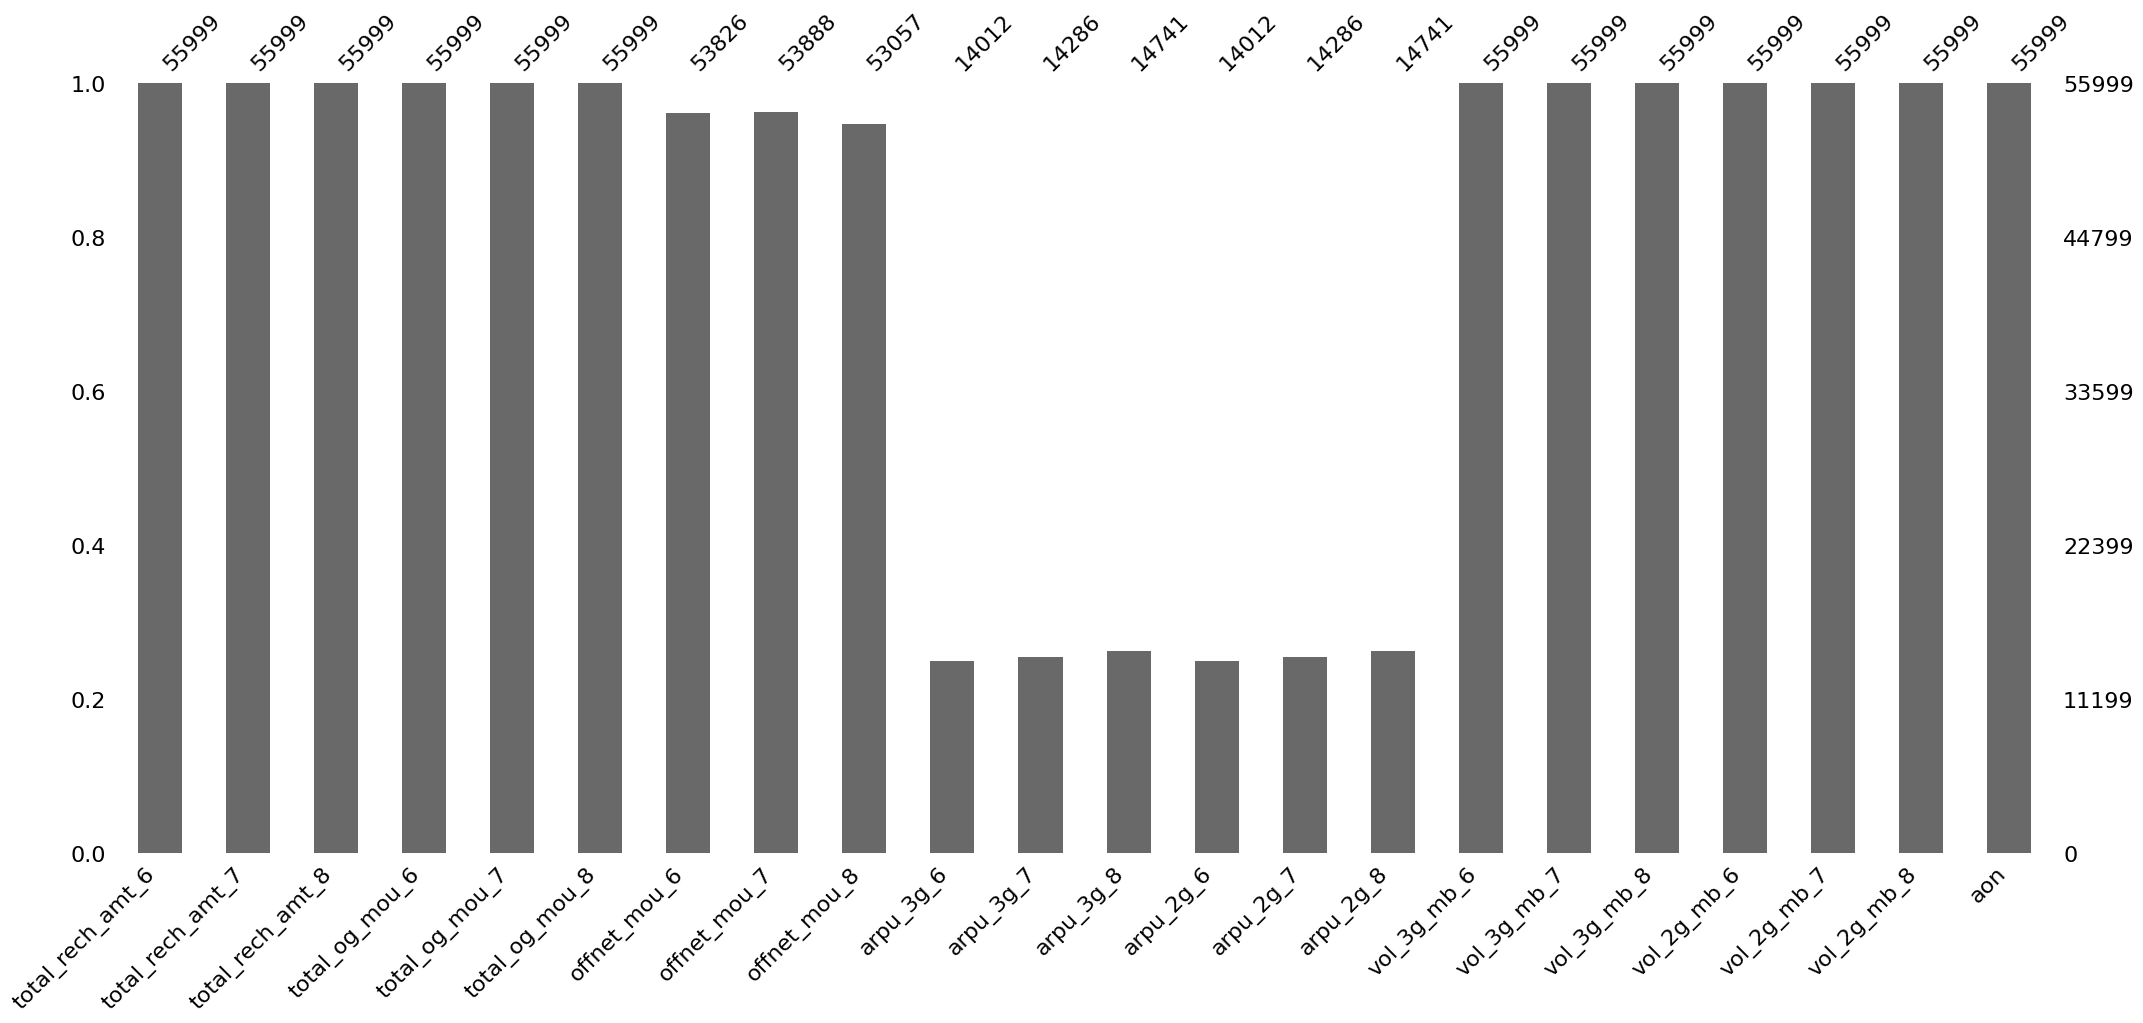

In [65]:
msno.bar(X_train)

<Axes: >

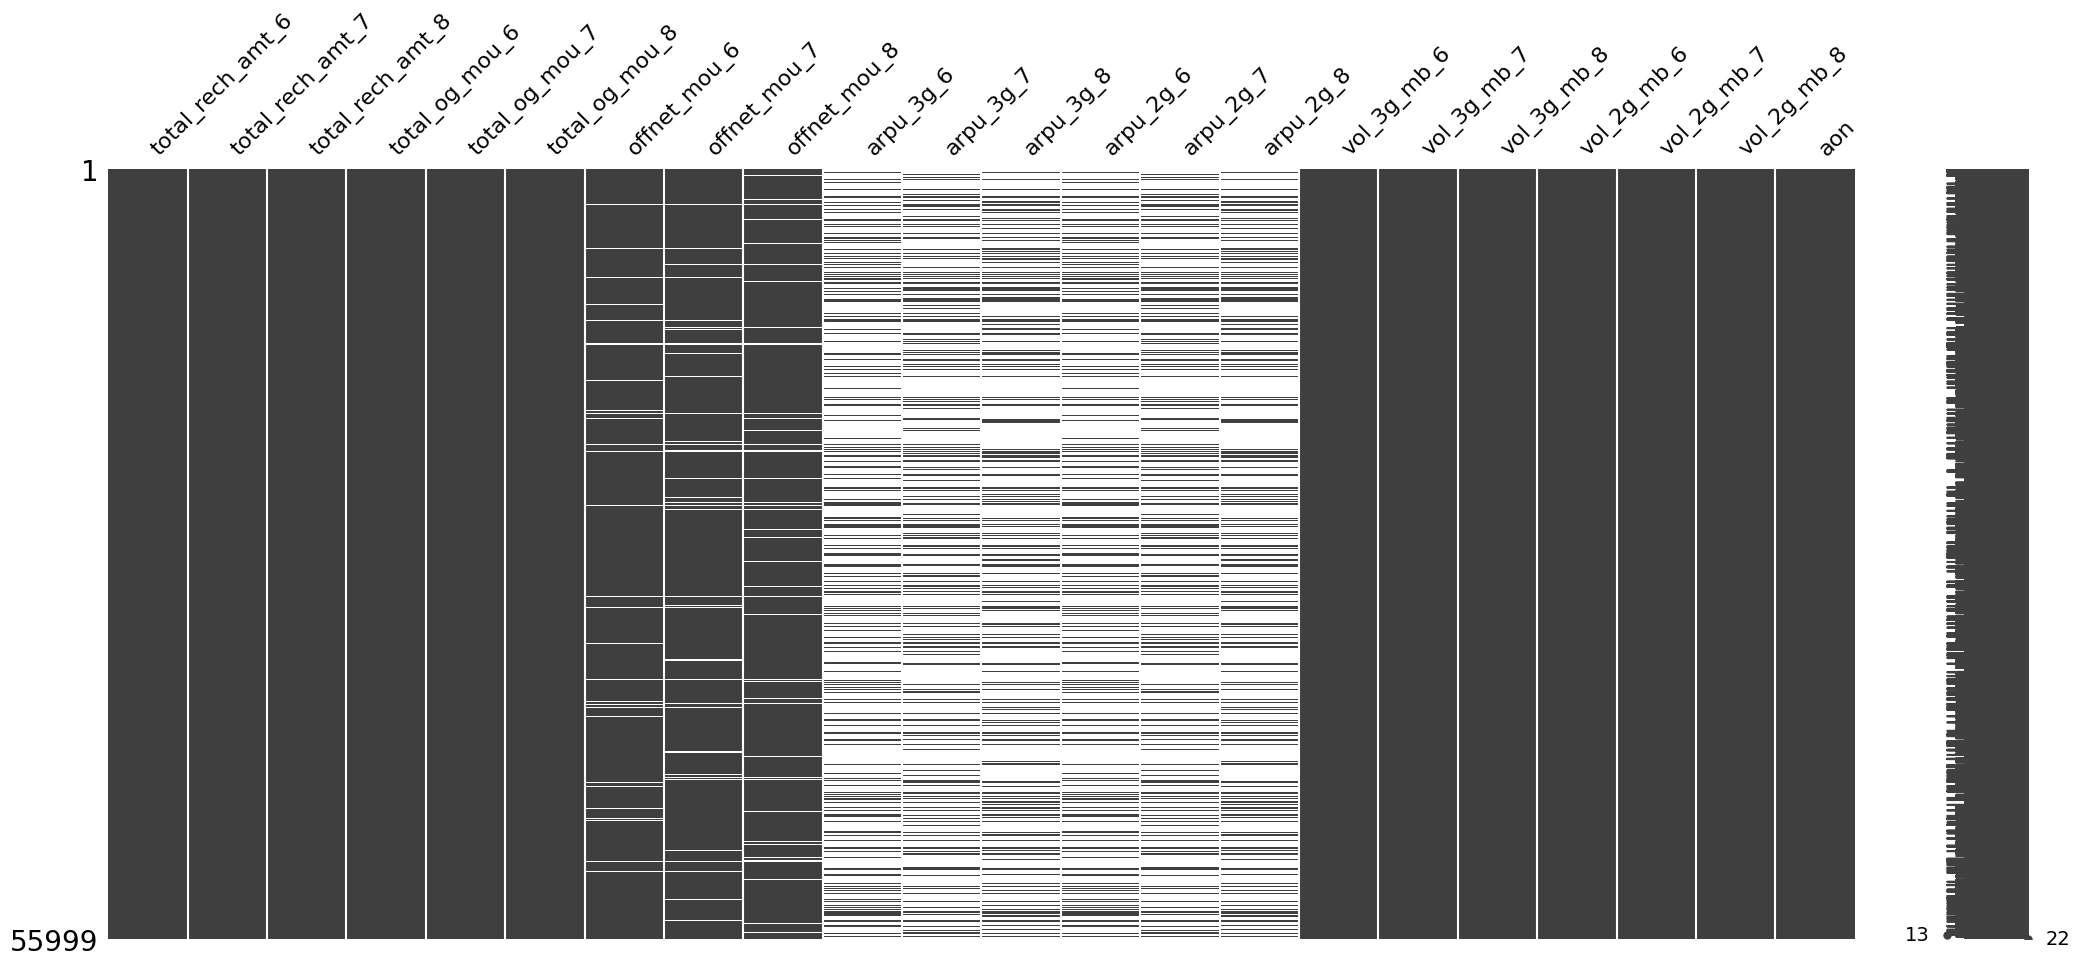

In [66]:
msno.matrix(X_train)

Lets also calculate the % missing data for each column:

In [67]:
missing_data_percent = 100*X_train.isnull().sum()/len(y_train)
missing_data_percent

total_rech_amt_6     0.000000
total_rech_amt_7     0.000000
total_rech_amt_8     0.000000
total_og_mou_6       0.000000
total_og_mou_7       0.000000
total_og_mou_8       0.000000
offnet_mou_6         3.880426
offnet_mou_7         3.769710
offnet_mou_8         5.253665
arpu_3g_6           74.978125
arpu_3g_7           74.488830
arpu_3g_8           73.676316
arpu_2g_6           74.978125
arpu_2g_7           74.488830
arpu_2g_8           73.676316
vol_3g_mb_6          0.000000
vol_3g_mb_7          0.000000
vol_3g_mb_8          0.000000
vol_2g_mb_6          0.000000
vol_2g_mb_7          0.000000
vol_2g_mb_8          0.000000
aon                  0.000000
dtype: float64

Since too much missing information would make a column not really a great predictor for churn, we drop these columns and keep only the ones which have less than 40% missing data.

In [68]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index
new_vars

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'aon'],
      dtype='object')

In [70]:
X_train_filtered = X_train[new_vars]
X_train_filtered.shape

(55999, 16)

Next, we try imputation on variables with any amount of missing data still left. There are multiple ways of imputing data, and each will require a good business understanding of what the missing data is and how you may handle it.

Some tips while working with missing data - 

1. Can simply replace missing values directly with a constant value such as 0
2. In certain cases you may want to replace it with the average value for each column respectively
3. For timeseries data, you may consider using linear or spline interplolation between a set of points, if you have data available for some of the months, and missing for the others.
4. You can consider more advance methods for imputation such as MICE.

In our case, I will just demostrate a simple imputation with constant values as zeros.

In [71]:
missing_data_percent = X_train_filtered.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], dtype='object')

In [74]:
# Correct way to drop the 'circle_id' column
X = data.drop(['circle_id'], axis=1).iloc[:, :-1]
y = data.iloc[:, -1]

# Check the shapes of X and y
X.shape, y.shape


((69999, 22), (69999,))

<Axes: >

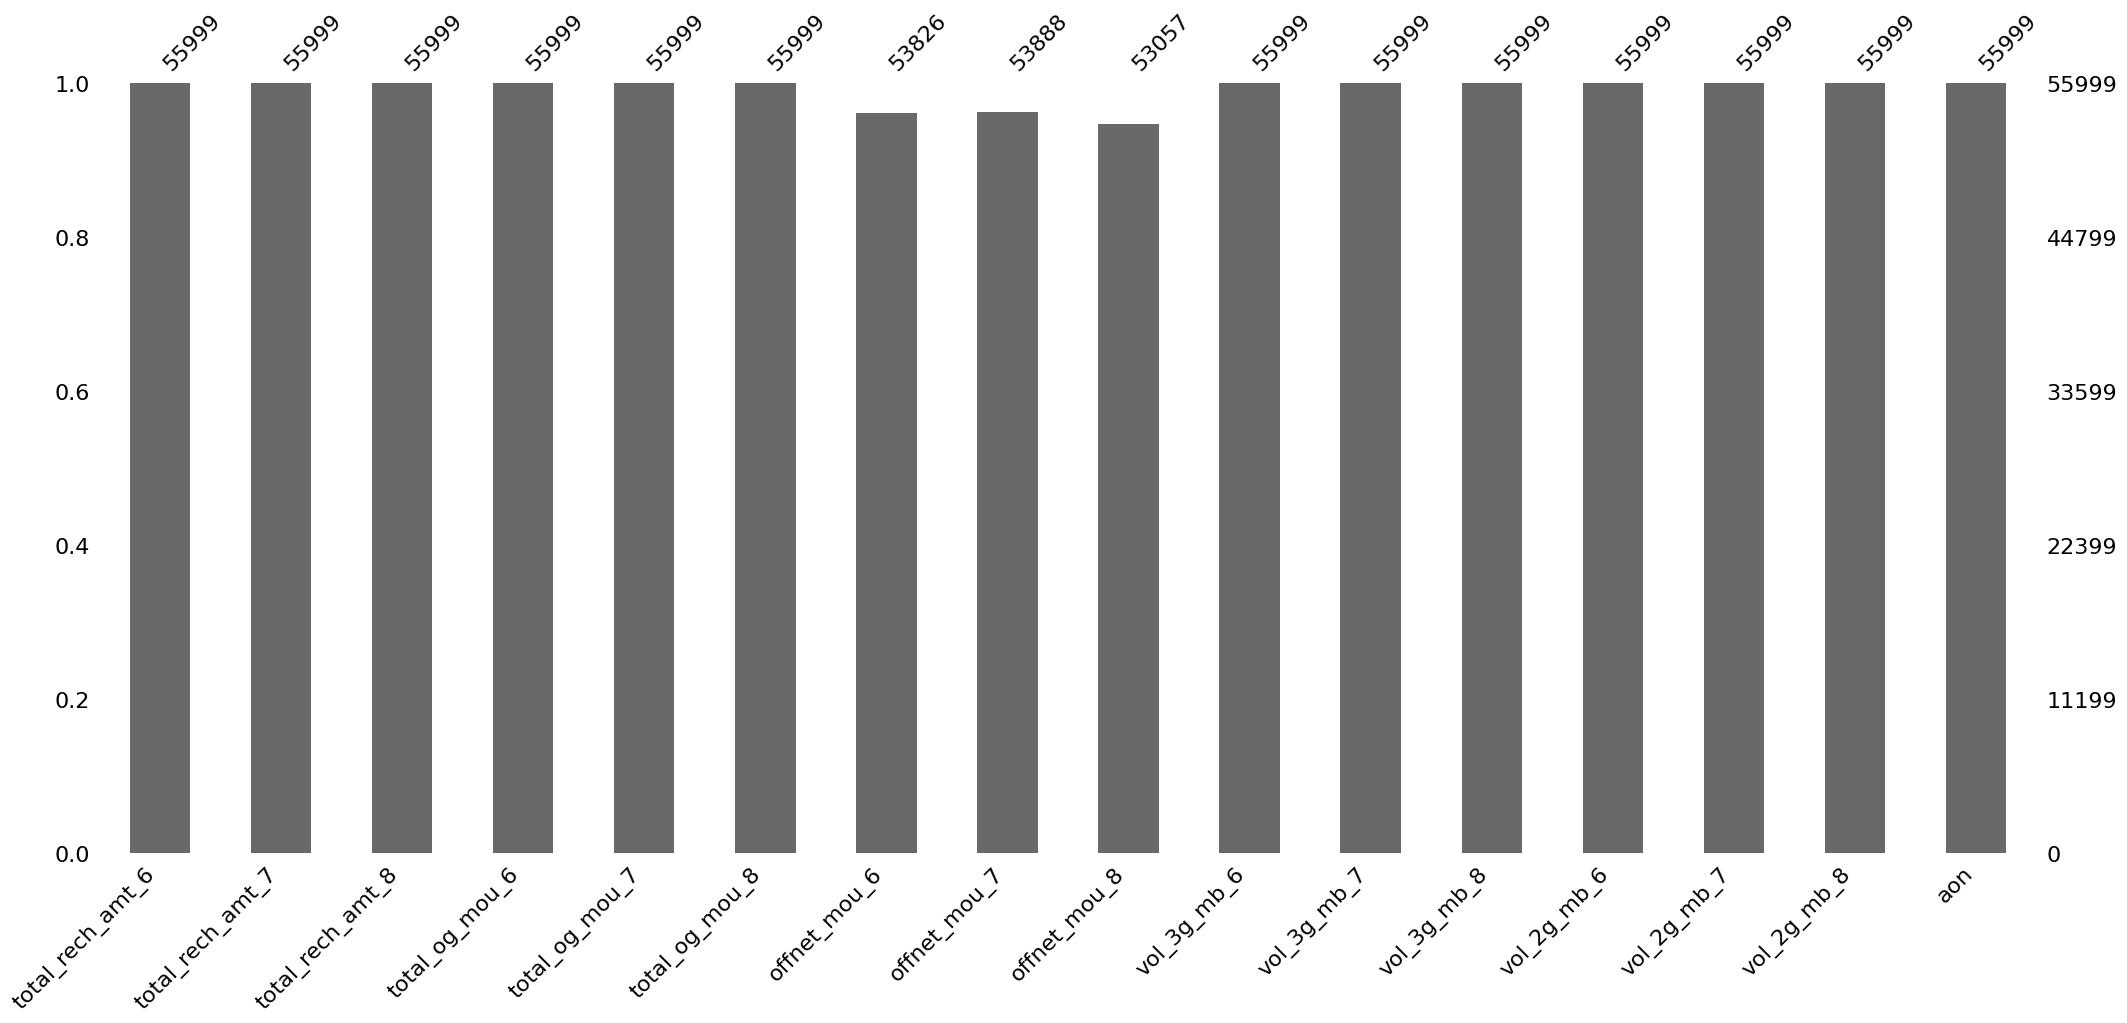

In [75]:
msno.bar(X_train_filtered)

In [76]:
X_train_filtered.describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,aon
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,53826.000000,53888.000000,53057.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,329.695405,322.530009,323.917338,307.797434,311.218323,305.660779,200.168032,198.094339,197.501749,123.215280,130.468432,136.373315,51.554924,51.179381,50.322465,1217.292255
std,405.021960,407.147215,420.062500,469.250728,482.537772,482.911397,321.249064,327.476674,330.139681,568.693187,570.293311,578.932461,209.466758,211.318796,213.431971,951.905506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000
25%,110.000000,100.000000,91.000000,44.985000,42.660000,38.680000,34.930000,32.040000,31.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000
50%,230.000000,220.000000,224.000000,145.760000,141.110000,138.590000,96.650000,91.750000,91.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,864.000000
75%,440.000000,430.000000,436.000000,374.950000,380.175000,371.660000,233.555000,227.067500,228.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1803.000000
max,35190.000000,40335.000000,45320.000000,10674.030000,8285.640000,14043.060000,8362.360000,7043.980000,14007.340000,45735.400000,28144.120000,30036.060000,7213.060000,7873.550000,11117.610000,4337.000000


# Exploratory Data Analysis & Preprocessing

Lets start by analysing the univariate distributions of each feature.

<Axes: >

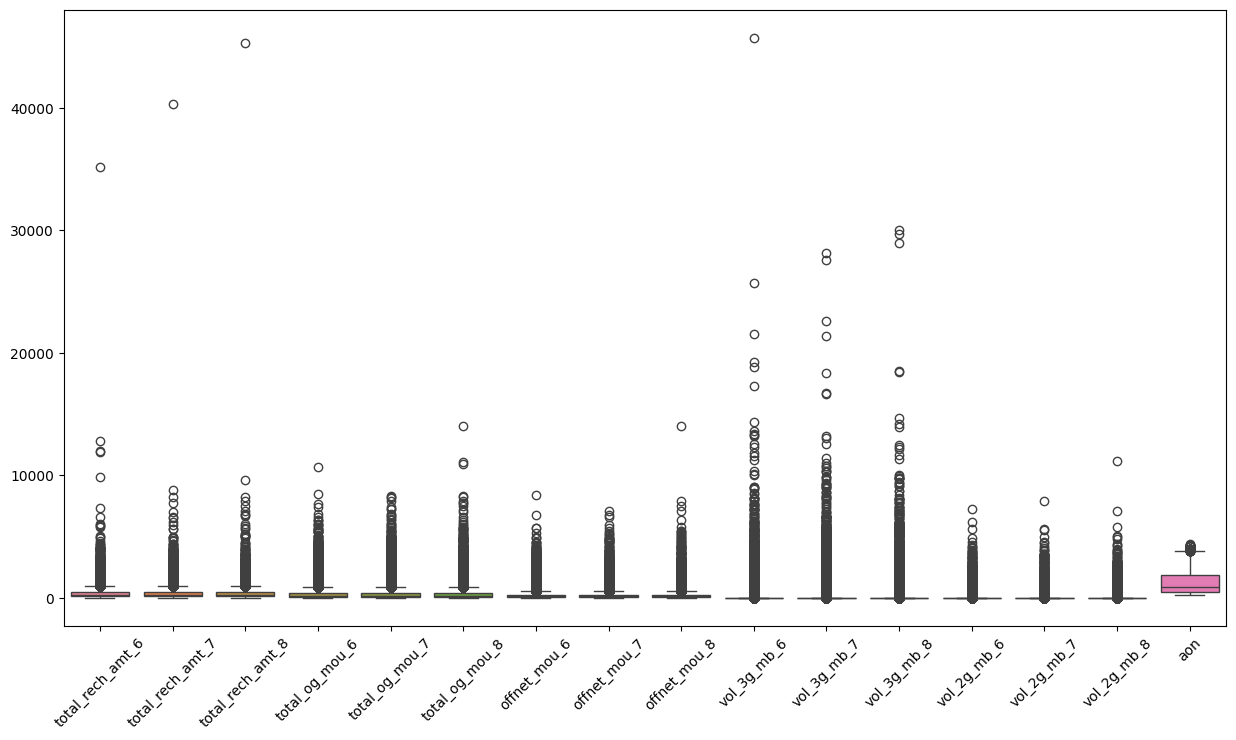

In [77]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered)

# Handling outliers

The box plots of these features show there a lot of outliers. These can be capped with k-sigma method.

In [78]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

/var/folders/m7/2jhtn1nd3pv9tmlz0n1xc6_w0000gn/T/ipykernel_16259/2079077991.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1544.7612859694207' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  array[array>upper_limit] = upper_limit
/var/folders/m7/2jhtn1nd3pv9tmlz0n1xc6_w0000gn/T/ipykernel_16259/2079077991.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1543.9716553080357' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  array[array>upper_limit] = upper_limit
/var/folders/m7/2jhtn1nd3pv9tmlz0n1xc6_w0000gn/T/ipykernel_16259/2079077991.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1584.1048369560353' has dtype incompatible with int64, please explicitl

<Axes: >

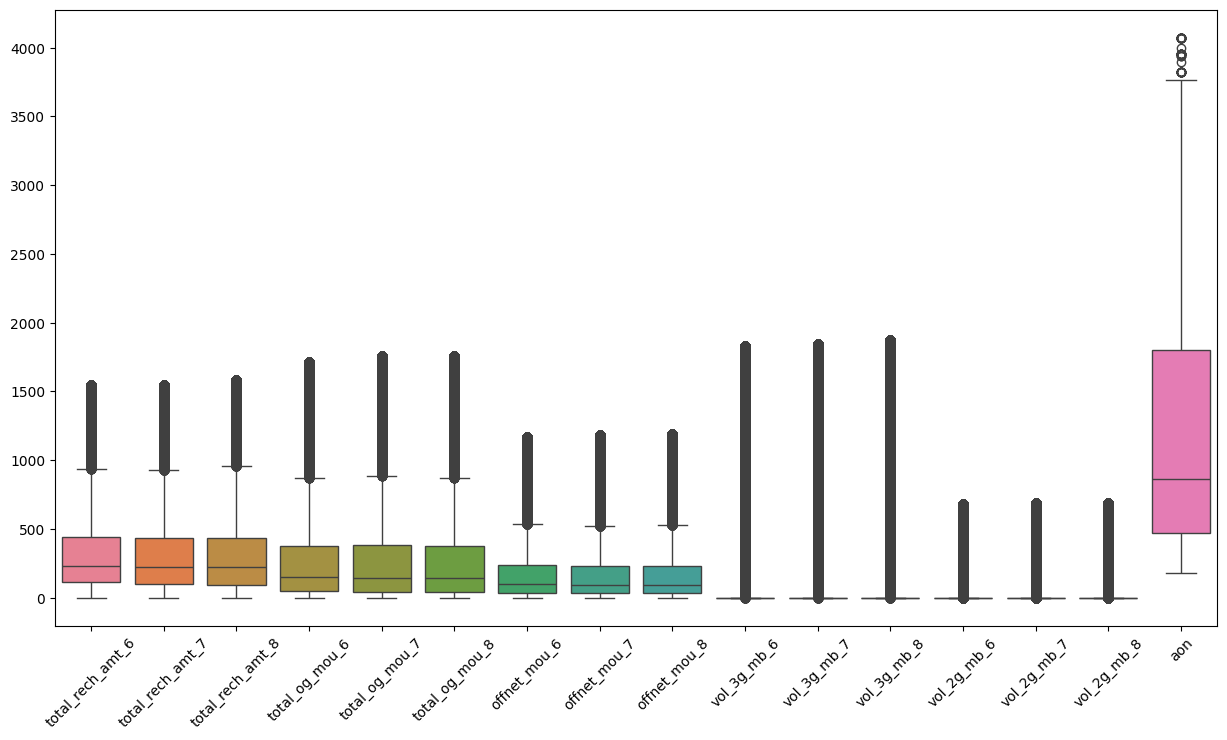

In [79]:
X_train_filtered1 = X_train_filtered.apply(cap_outliers, axis=0)

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_filtered1)

### Feature scaling

Lets also scale the features by scaling them with Standard scaler (few other alternates are min-max scaling and Z-scaling).

In [80]:
scale = StandardScaler()
X_train_filtered2 = scale.fit_transform(X_train_filtered1)

<Axes: >

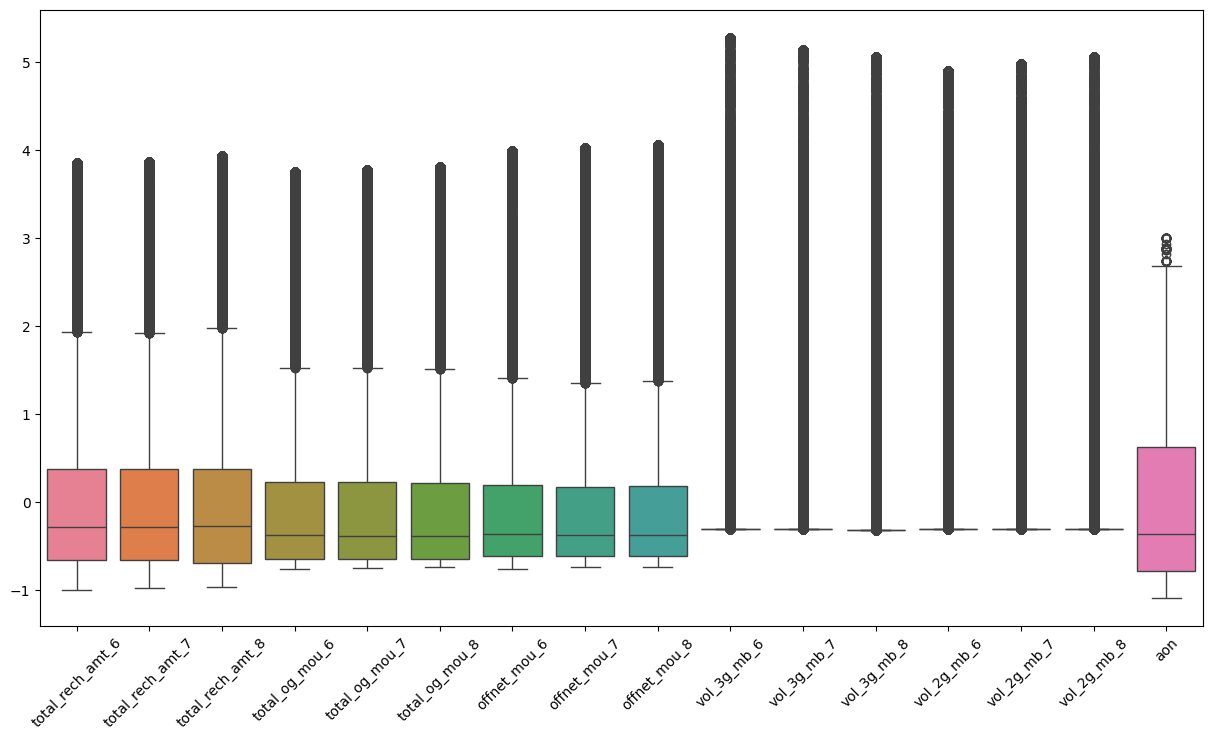

In [81]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = pd.DataFrame(X_train_filtered2, columns=new_vars))

You can perform feature transformations at this stage. 

1. **Positively skewed:** Common transformations of this data include square root, cube root, and log.
2. **Negatively skewed:** Common transformations include square, cube root and logarithmic.

Please read the following link to understand how to perform feature scaling and preprocessing : https://scikit-learn.org/stable/modules/preprocessing.html
 
Lets also plot the correlations for each feature for bivariate analysis.

<Axes: >

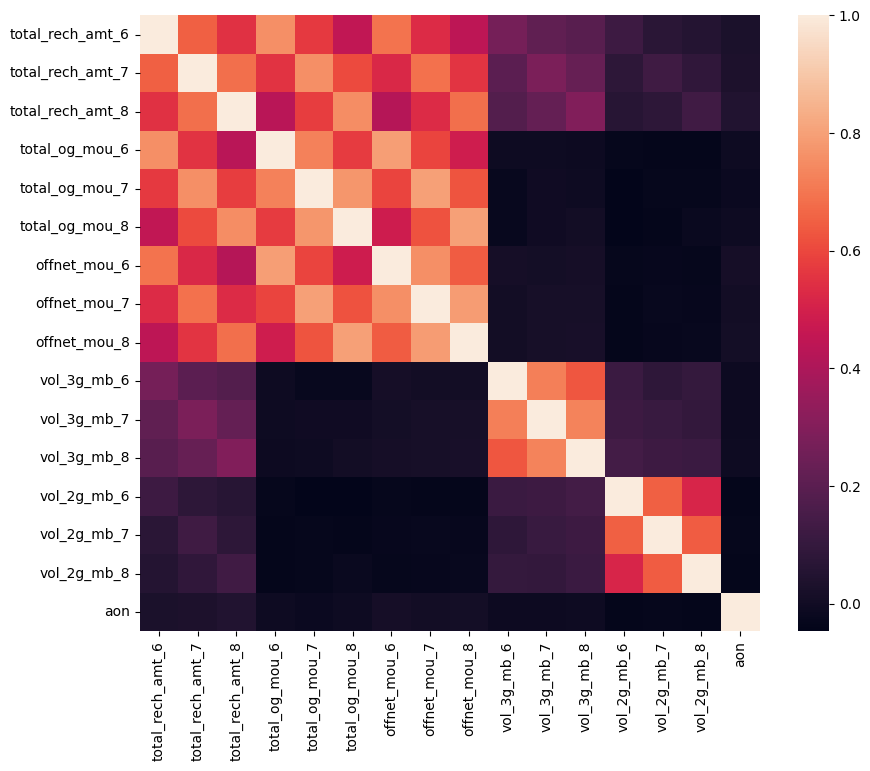

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(X_train_filtered2, columns=new_vars).corr())

<Axes: xlabel='churn_probability', ylabel='Count'>

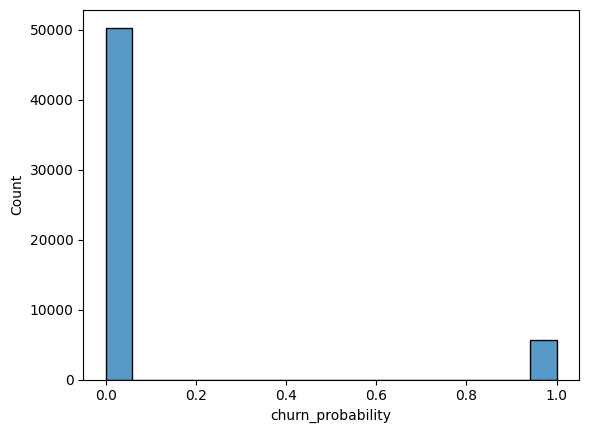

In [83]:
#Distribution for the churn probability
sns.histplot(y_train)

# Feature engineering and selection

Let's understand feature importances for raw features as well as components to decide top features for modelling.

In [84]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_filtered2, y_train)

RandomForestClassifier(n_jobs=-1)

In [85]:
feature_importances = pd.DataFrame({'col':new_vars, 'importance':rf.feature_importances_})

<BarContainer object of 16 artists>

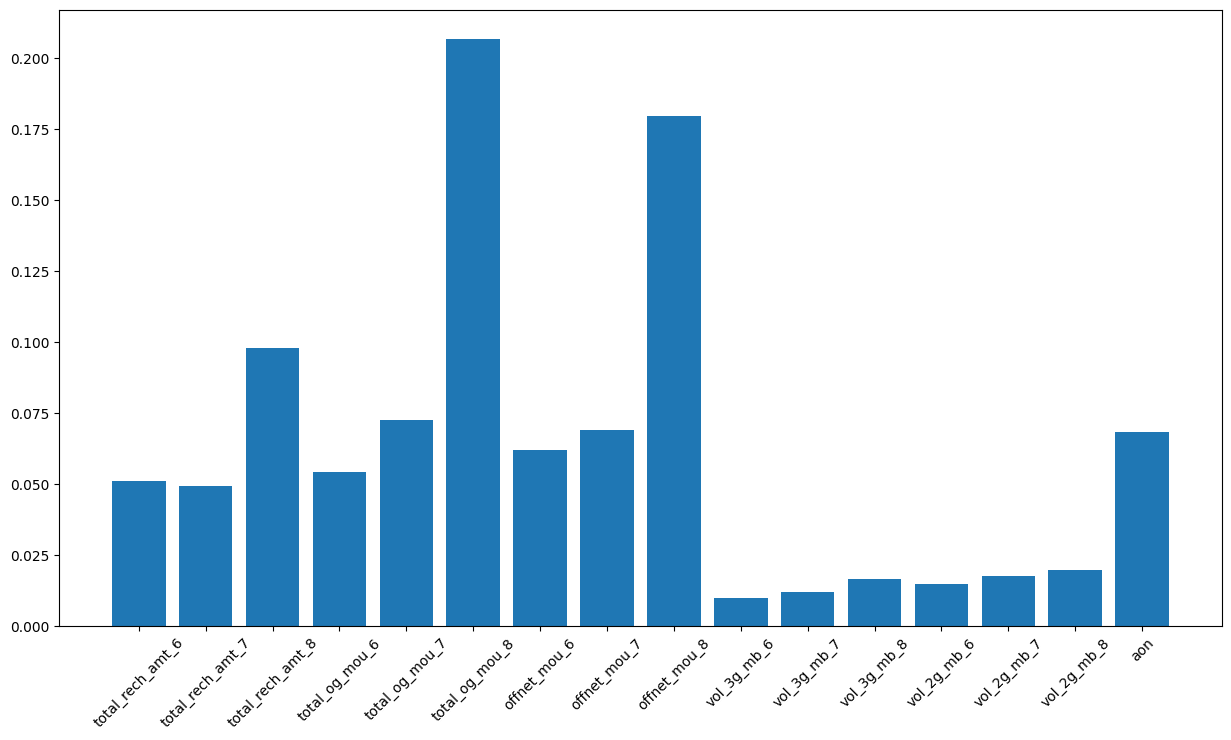

In [86]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

At this step, you can create a bunch of features based on business understanding, such as 
1. "average % gain of 3g volume from month 6 to 8" - (growth or decline of 3g usage month over month?)
2. "ratio of total outgoing amount and age of user on network" - (average daily usage of a user?)
3. "standard deviation of the total amount paid by user for all services" - (too much variability in charges?)
4. etc..

Another way of finding good features would be to project them into a lower dimensional space using PCA. PCA creates components which are a linear combination of the features. This then allows you to select components which explain the highest amount of variance.

Lets try to project the data onto 2D space and plot. **Note:** you can try TSNE, which is another dimensionality reduction approach as well. Check https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html for more details.

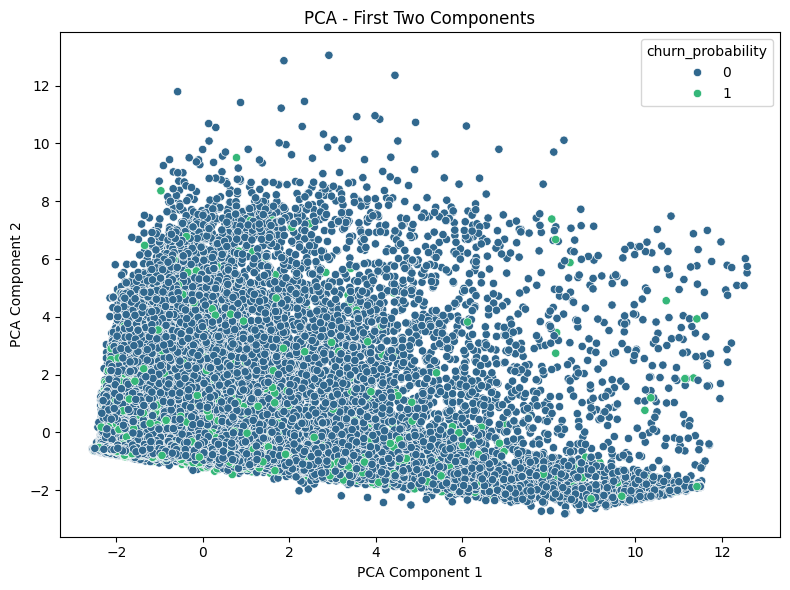

In [91]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Impute missing values with the mean (you can choose other strategies like median or constant)
imputer = SimpleImputer(strategy='mean')
X_train_filtered2_imputed = imputer.fit_transform(X_train_filtered2)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components
pca_components = pca.fit_transform(X_train_filtered2_imputed)

# Create a scatter plot with the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=y_train, palette='viridis')
plt.title("PCA - First Two Components")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="churn_probability")
plt.tight_layout()
plt.show()


<Axes: >

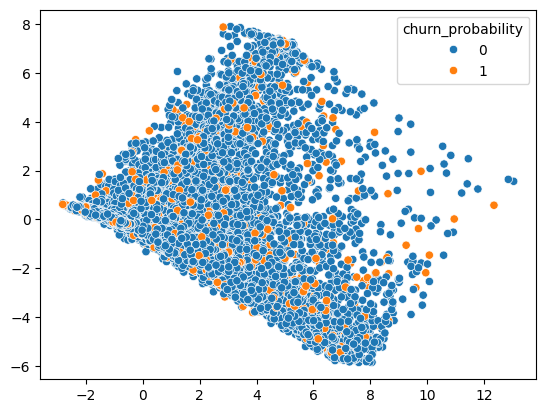

In [268]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)

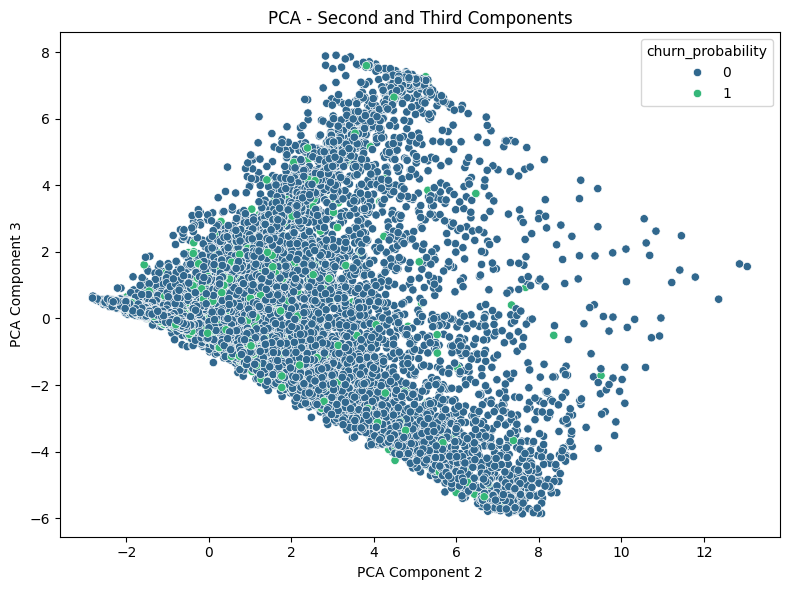

In [94]:
pca = PCA(n_components=3)
pca_components = pca.fit_transform(X_train_filtered2_imputed) 

# Create a scatter plot with the second and third principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 1], y=pca_components[:, 2], hue=y_train, palette='viridis')
plt.title("PCA - Second and Third Components")
plt.xlabel("PCA Component 2")
plt.ylabel("PCA Component 3")
plt.legend(title="churn_probability")
plt.tight_layout()
plt.show()

Let's also check which of the components have high feature importances towards the end goal of churn prediction.

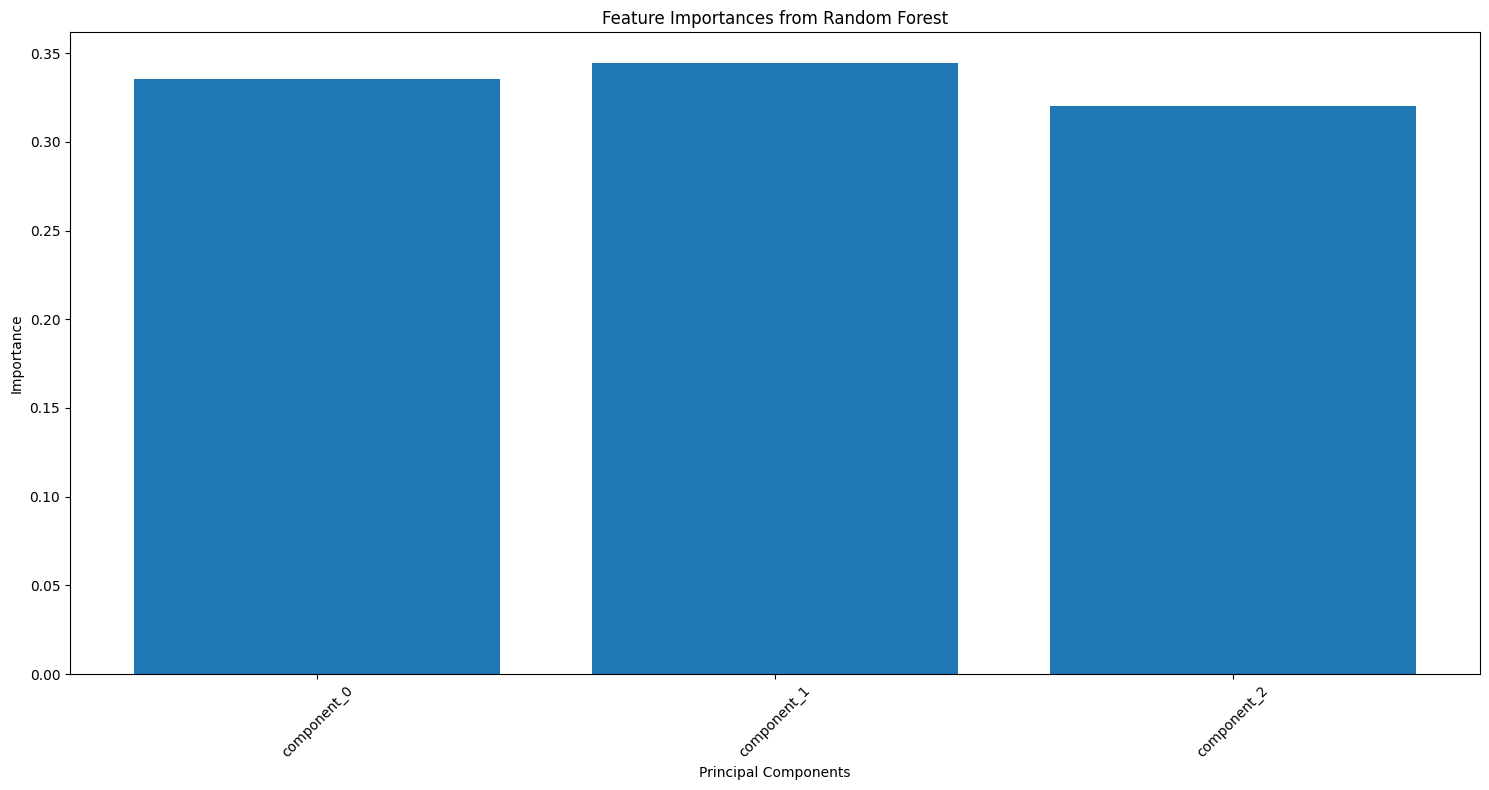

In [109]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(pca_components, y_train)

# Dynamically determine the number of components
num_components = pca_components.shape[1]

feature_importances = pd.DataFrame({
    'col': ['component_' + str(i) for i in range(num_components)],
    'importance': rf.feature_importances_
})

plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])
plt.title("Feature Importances from Random Forest")
plt.xlabel("Principal Components")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


# Model building

Let's build a quick model with logistic regression and the first 2 PCA components.

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the training and test datasets
train = pd.read_csv('/Users/sanket/Downloads/train.csv')
test = pd.read_csv('/Users/sanket/Downloads/test.csv')

# Define the target label
target = 'churn_probability'

# Preprocessing: Convert non-numeric data to numeric
def preprocess_data(df):
    # Convert dates to numeric features or drop them
    for col in df.select_dtypes(include=['object']).columns:
        try:
            # Try to convert to datetime
            df[col] = pd.to_datetime(df[col])
            df[f"{col}_year"] = df[col].dt.year
            df[f"{col}_month"] = df[col].dt.month
            df[f"{col}_day"] = df[col].dt.day
            df.drop(columns=[col], inplace=True)
        except:
            # Convert other strings to numeric using Label Encoding
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    return df

train = preprocess_data(train)
test = preprocess_data(test)

# Separate features and target variable in the training data
X_train = train.drop(columns=[target])
y_train = train[target]

# For test data, check if the target column is available
if target in test.columns:
    X_test = test.drop(columns=[target])
    y_test = test[target]
else:
    X_test = test
    y_test = None
    print(f"Warning: Target column '{target}' not found in the test data.")

# Train-test split (optional, if you want a validation set from train data)
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train_split, y_train_split)

# Validate the model
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Predict on test data if test labels are available
if y_test is not None:
    y_test_pred = clf.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Test Classification Report:")
    print(classification_report(y_test, y_test_pred))
else:
    print("Test labels are not available. Predictions can't be evaluated.")


Validation Accuracy: 0.9437857142857143
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.78      0.62      0.69      1422

    accuracy                           0.94     14000
   macro avg       0.87      0.80      0.83     14000
weighted avg       0.94      0.94      0.94     14000

Test labels are not available. Predictions can't be evaluated.


In [126]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train_split),
    y=y_train_split
)
class_weight_dict = dict(enumerate(class_weights))

# Train the model with class weights
clf = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)
clf.fit(X_train_split, y_train_split)

# Validate the model
y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Predict on test data
test_predictions = clf.predict(X_test)

# Save predictions to a CSV file
test['churn_probability_prediction'] = test_predictions
test.to_csv('test_predictions.csv', index=False)
print("Test predictions saved to 'test_predictions.csv'")


Validation Accuracy: 0.9422142857142857
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     12578
           1       0.79      0.59      0.68      1422

    accuracy                           0.94     14000
   macro avg       0.87      0.79      0.82     14000
weighted avg       0.94      0.94      0.94     14000

Test predictions saved to 'test_predictions.csv'


In [130]:
print("Columns in X_train_split:", X_train_split.shape[1])
print("Columns in X_test:", X_test.shape[1])


Columns in X_train_split: 189
Columns in X_test: 190


In [131]:
extra_columns = set(X_test.columns) - set(X_train.columns)
print("Extra columns in X_test:", extra_columns)


Extra columns in X_test: {'churn_probability_prediction'}


In [135]:
# Drop the extra column 'churn_probability_prediction' from test
if 'churn_probability_prediction' in test.columns:
    test = test.drop(columns=['churn_probability_prediction'])

# Align test columns with train columns before applying transformations
X_test_aligned = test[train.columns.drop('churn_probability')]  # Select only matching feature columns

from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_split = scaler.fit_transform(X_train_split)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42, class_weight='balanced', max_iter=5000, solver='saga')


# Train the model
log_reg.fit(X_train_split, y_train_split)

# Validate the model
y_val_pred = log_reg.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Predict on test data
test_predictions = log_reg.predict(X_test)

# Save predictions to a CSV file
test['churn_probability_prediction'] = test_predictions
test.to_csv('logistic_regression_test_predictions.csv', index=False)
print("Test predictions saved to 'logistic_regression_test_predictions.csv'")


Validation Accuracy: 0.8552142857142857
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91     12578
           1       0.40      0.86      0.55      1422

    accuracy                           0.86     14000
   macro avg       0.69      0.86      0.73     14000
weighted avg       0.92      0.86      0.88     14000

Test predictions saved to 'logistic_regression_test_predictions.csv'


a validation accuracy of approximately 85.52%. However, the recall for class 1 (churn) is quite high at 86%, which suggests the model is identifying most of the positive cases, but the precision for class 1 (40%) is low, indicating a higher rate of false positives.



In [176]:
from sklearn.model_selection import train_test_split

# Ensure this step is included and correct
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [177]:
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (55999, 22), X_test shape: (14000, 22)
y_train shape: (55999,), y_test shape: (14000,)


In [265]:
print(df.columns)


Index(['col1', 'col2', 'col3'], dtype='object')


In [137]:
imp = SimpleImputer(strategy='constant', fill_value=0)
scale = StandardScaler()
pca = PCA(n_components=10)
lr = LogisticRegression(max_iter=1000, tol=0.001)

In [139]:
from sklearn.pipeline import Pipeline

# Now you can define your pipeline
pipe = Pipeline(steps=[('imputation', imp),
                        ('scaling', scale),
                        ('pca', pca),
                        ('model', lr)])


In [140]:
pipe.fit(X_train[new_vars], y_train)

Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [141]:
train_score = pipe.score(X_train[new_vars], y_train)
print("Training accuracy:", train_score)

Training accuracy: 0.9000271432449035


In [147]:
print(len(new_vars))  # Length of the new_vars list
print(X_test.shape[1])  # Number of columns in X_test


3
189


In [262]:
print(X_train.columns)  # To check the columns in X_train
print(X_test.columns)   # To check the columns in X_test


Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'aon'],
      dtype='object')
Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'aon'],
      dtype='object')


In [153]:
X_test_df = pd.DataFrame(X_test)  # Use all columns from X_test
print(X_test_df.columns)  # Display all columns in X_test


RangeIndex(start=0, stop=189, step=1)


In [183]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('imputation',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(max_iter=1000, tol=0.001))])

In [184]:
print(new_vars)
print(X_train.columns)  # Ensure these match


Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'aon'],
      dtype='object')
Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'aon'],
      dtype='object')


In [185]:
print(X_test.isnull().sum())


total_rech_amt_6        0
total_rech_amt_7        0
total_rech_amt_8        0
total_og_mou_6          0
total_og_mou_7          0
total_og_mou_8          0
offnet_mou_6          550
offnet_mou_7          559
offnet_mou_8          770
arpu_3g_6           10518
arpu_3g_7           10421
arpu_3g_8           10304
arpu_2g_6           10518
arpu_2g_7           10421
arpu_2g_8           10304
vol_3g_mb_6             0
vol_3g_mb_7             0
vol_3g_mb_8             0
vol_2g_mb_6             0
vol_2g_mb_7             0
vol_2g_mb_8             0
aon                     0
dtype: int64


In [186]:
assert list(X_test[new_vars].columns) == list(X_train.columns), "Column mismatch between train and test data!"


In [188]:
for step_name, step in pipe.named_steps.items():
    print(f"Processing with step: {step_name}")
    try:
        X_test_transformed = step.transform(X_test[new_vars])
        print(f"{step_name} output shape: {X_test_transformed.shape}")
    except Exception as e:
        print(f"Error in step: {step_name}")
        print(e)
        break


Processing with step: imputation
imputation output shape: (14000, 22)
Processing with step: scaling
scaling output shape: (14000, 22)
Processing with step: pca
Error in step: pca
Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


/Volumes/sanket/telecom/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Volumes/sanket/telecom/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [189]:
X_imputed = pipe.named_steps['imputation'].transform(X_test[new_vars])
print(pd.DataFrame(X_imputed).isnull().sum())


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64


In [192]:
from sklearn.ensemble import RandomForestClassifier

# Define a classifier
classifier = RandomForestClassifier(random_state=42)


In [193]:
pipe = Pipeline(steps=[
    ('imputation', imputer),
    ('scaling', scaler),
    ('pca', pca),
    ('classifier', classifier)
])


In [194]:
pipe.fit(X_train[new_vars], y_train)
test_score = pipe.score(X_test[new_vars], y_test)
print("Test accuracy:", test_score)


Test accuracy: 0.9195


In [197]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'pca__n_components': [5, 10, 15],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train[new_vars], y_train)

print("Best parameters:", grid_search.best_params_)
print("Best test score:", grid_search.best_score_)


Best parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 100, 'pca__n_components': 15}
Best test score: 0.9218021825928335


In [198]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, X_train[new_vars], y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation scores: [0.91875    0.91696429 0.91508929 0.91508929 0.9150817 ]
Mean CV accuracy: 0.9161949121732806


In [201]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train[new_vars])

# Fit PCA
pca_manual = PCA(n_components=15)
pca_manual.fit(X_train_imputed)

# Explained variance ratio
print("Explained variance ratio:", pca_manual.explained_variance_ratio_)


Explained variance ratio: [0.2774619  0.26316211 0.21700324 0.04695231 0.03379957 0.03194463
 0.02574403 0.02463411 0.02160361 0.01976671 0.00828948 0.00629162
 0.00609491 0.00440145 0.00398433]


In [202]:
# Fit the pipeline
pipe.fit(X_train[new_vars], y_train)

# Access PCA step in the pipeline
pca_step = pipe.named_steps['pca']

# Explained variance ratio
print("Explained variance ratio:", pca_step.explained_variance_ratio_)


Explained variance ratio: [0.29656771 0.23189221 0.10278019 0.04920971 0.04590108 0.04092728
 0.03834689 0.03570167 0.03141082 0.0232421 ]


In [203]:
# Adjust feature preparation
def prepare_features(self):
    target_column = "churn_probability"
    columns_to_drop = ["id", "circle_id"]  # Adjust columns as needed

    # Drop date columns
    date_columns = [col for col in self.train_data.columns if 'last_date_of_month' in col]
    self.train_data.drop(columns=date_columns, inplace=True, errors='ignore')
    self.test_data.drop(columns=date_columns, inplace=True, errors='ignore')

    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    self.train_data = pd.DataFrame(imputer.fit_transform(self.train_data), columns=self.train_data.columns)
    self.test_data = pd.DataFrame(imputer.transform(self.test_data), columns=self.test_data.columns)

    # Separate features and target
    if target_column in self.train_data.columns:
        y_train = self.train_data[target_column]
        X_train = self.train_data.drop(columns=columns_to_drop + [target_column])
    else:
        raise KeyError(f"Target column '{target_column}' not found in the training data!")

    if target_column in self.test_data.columns:
        y_test = self.test_data[target_column]
        X_test = self.test_data.drop(columns=columns_to_drop + [target_column])
    else:
        y_test = None
        X_test = self.test_data.drop(columns=columns_to_drop)

    # Scale features
    self.scaler = StandardScaler()
    self.X_train = self.scaler.fit_transform(X_train)
    self.X_test = self.scaler.transform(X_test)

    return self


# Addressing Missing Columns in the Test Dataset

In [208]:
if 'churn_probability' not in test_data.columns:
    test_data['churn_probability'] = -1  # Placeholder if needed


In [209]:
date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
for col in date_cols:
    train_data[col] = pd.to_datetime(train_data[col], errors='coerce')
    test_data[col] = pd.to_datetime(test_data[col], errors='coerce')


In [210]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' if needed
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

train_data[numerical_cols] = imputer.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = imputer.transform(test_data[numerical_cols])


In [215]:
from sklearn.preprocessing import LabelEncoder

# Convert datetime columns to numeric format
date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
for col in date_cols:
    train_data[col] = pd.to_datetime(train_data[col], errors='coerce').astype('int64') // 10**9
    test_data[col] = pd.to_datetime(test_data[col], errors='coerce').astype('int64') // 10**9

# Identify non-numeric columns in the feature set
non_numeric_cols = train_data[features].select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Encode categorical column
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str))
    label_encoders[col] = le

# Ensure all features are numeric
features = [
    col for col in train_data.columns 
    if col not in ['churn_probability', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']
]

# Model Training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

model.fit(train_data[features], train_data['churn_probability'])

# Model Prediction
predictions = model.predict(test_data[features])

# Print predictions to validate
print("Predictions on test data:")
print(predictions)


Non-numeric columns: Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')
Predictions on test data:
[0. 0. 1. ... 0. 0. 0.]


In [216]:
train_data.to_csv("encoded_train_data.csv", index=False)
test_data.to_csv("encoded_test_data.csv", index=False)


In [214]:
print(train_data[features].dtypes)


id                float64
circle_id         float64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
fb_user_8         float64
aon               float64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
Length: 168, dtype: object


In [222]:
pipe.fit(X_train[new_vars], y_train)


Pipeline(steps=[('imputation', SimpleImputer()), ('scaling', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [223]:
SimpleImputer(strategy='mean')  


SimpleImputer()

In [224]:
assert set(new_vars) == set(X_train.columns), "Mismatch in feature columns!"


In [225]:
# Verify the pipeline working
transformed_train = pipe[:-1].transform(X_train[new_vars])
print("Transformed Training Data Shape:", transformed_train.shape)

# Check if the final estimator works
print(pipe.named_steps['classifier'].estimators_)


Transformed Training Data Shape: (55999, 10)
[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542), DecisionTreeClassifier(max_features='sqrt', random_state=1273642419), DecisionTreeClassifier(max_features='sqrt', random_state=1935803228), DecisionTreeClassifier(max_features='sqrt', random_state=787846414), DecisionTreeClassifier(max_features='sqrt', random_state=996406378), DecisionTreeClassifier(max_features='sqrt', random_state=1201263687), DecisionTreeClassifier(max_features='sqrt', random_state=423734972), DecisionTreeClassifier(max_features='sqrt', random_state=415968276), DecisionTreeClassifier(max_features='sqrt', random_state=670094950), DecisionTreeClassifier(max_features='sqrt', random_state=1914837113), DecisionTreeClassifier(max_features='sqrt', random_state=669991378), DecisionTreeClassifier(max_features='sqrt', random_state=429389014), DecisionTreeClassifier(max_features='sqrt', random_state=249467210), DecisionTreeClassifier(max_features='sqrt', random_s

In [226]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# trained PL
pipe.fit(X_train[new_vars], y_train)

# Confusion matrix for training data
train_cm = confusion_matrix(y_train, pipe.predict(X_train[new_vars]))
print("Confusion Matrix (Train):", train_cm)

# Confusion matrix for test data
test_cm = confusion_matrix(y_test, pipe.predict(X_test[new_vars]))
print("Confusion Matrix (Test):", test_cm)

# Precision and recall for test data
precision = precision_score(y_test, pipe.predict(X_test[new_vars]))
recall = recall_score(y_test, pipe.predict(X_test[new_vars]))

print("Precision (Test):", precision)
print("Recall (Test):", recall)


Confusion Matrix (Train): [[50289     0]
 [    1  5709]]
Confusion Matrix (Test): [[12425   153]
 [  974   448]]
Precision (Test): 0.7454242928452579
Recall (Test): 0.3150492264416315


In [227]:
transformed = pipe.named_steps['pca'].transform(pipe[:-2].transform(X_train[new_vars]))
print("PCA Output Shape:", transformed.shape)


PCA Output Shape: (55999, 10)


In [228]:
preds_train = pipe.predict(X_train[new_vars])
preds_test = pipe.predict(X_test[new_vars])
print(preds_train[:5], preds_test[:5])


[0 0 0 0 1] [0 0 0 0 0]


In [229]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Confusion matrix for training data
train_cm = confusion_matrix(y_train, pipe.predict(X_train[new_vars]))
print("Confusion Matrix (Train):")
print(train_cm)

# Confusion matrix for test data
test_cm = confusion_matrix(y_test, pipe.predict(X_test[new_vars]))
print("Confusion Matrix (Test):")
print(test_cm)

# Precision score for test data
precision = precision_score(y_test, pipe.predict(X_test[new_vars]))
print("Precision (Test):", precision)

# Recall score for test data
recall = recall_score(y_test, pipe.predict(X_test[new_vars]))
print("Recall (Test):", recall)


Confusion Matrix (Train):
[[50289     0]
 [    1  5709]]
Confusion Matrix (Test):
[[12425   153]
 [  974   448]]
Precision (Test): 0.7454242928452579
Recall (Test): 0.3150492264416315


In [232]:
print(X_train[new_vars].isnull().sum())


total_rech_amt_6        0
total_rech_amt_7        0
total_rech_amt_8        0
total_og_mou_6          0
total_og_mou_7          0
total_og_mou_8          0
offnet_mou_6         2218
offnet_mou_7         2128
offnet_mou_8         2933
arpu_3g_6           41913
arpu_3g_7           41713
arpu_3g_8           41278
arpu_2g_6           41913
arpu_2g_7           41713
arpu_2g_8           41278
vol_3g_mb_6             0
vol_3g_mb_7             0
vol_3g_mb_8             0
vol_2g_mb_6             0
vol_2g_mb_7             0
vol_2g_mb_8             0
aon                     0
dtype: int64


In [234]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train[new_vars])


In [235]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline = ImbPipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42))
])

X_resampled, y_resampled = pipeline.fit_resample(X_train[new_vars], y_train)


In [236]:
print(pd.DataFrame(X_train_imputed).isnull().sum().sum())  


0


In [240]:
print(pd.DataFrame(X_train_imputed, columns=new_vars).isnull().sum())
print(pd.DataFrame(X_train_imputed, columns=new_vars).isnull().sum().sum())  


total_rech_amt_6    0
total_rech_amt_7    0
total_rech_amt_8    0
total_og_mou_6      0
total_og_mou_7      0
total_og_mou_8      0
offnet_mou_6        0
offnet_mou_7        0
offnet_mou_8        0
arpu_3g_6           0
arpu_3g_7           0
arpu_3g_8           0
arpu_2g_6           0
arpu_2g_7           0
arpu_2g_8           0
vol_3g_mb_6         0
vol_3g_mb_7         0
vol_3g_mb_8         0
vol_2g_mb_6         0
vol_2g_mb_7         0
vol_2g_mb_8         0
aon                 0
dtype: int64
0


In [241]:
print(X_train_imputed.shape)
print(y_train.shape)


(55999, 22)
(55999,)


In [242]:
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=new_vars)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed_df, y_train)


In [243]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train[new_vars])

# Convert to DataFrame to ensure column alignment
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=new_vars)

# Checkinf for missing values again
print(X_train_imputed_df.isnull().sum().sum())  # Should output 0

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_imputed_df, y_train)

# Verify output shapes
print(X_resampled.shape, y_resampled.shape)


0
(100578, 22) (100578,)


In [237]:
X_resampled, y_resampled = smote.fit_resample(X_train_imputed, y_train)


In [244]:
from sklearn.model_selection import train_test_split

X_train_final, X_valid, y_train_final, y_valid = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)
print(X_train_final.shape, X_valid.shape, y_train_final.shape, y_valid.shape)


(80462, 22) (20116, 22) (80462,) (20116,)


In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_final, y_train_final)

# Predict on the validation set
y_pred = model.predict(X_valid)
y_pred_prob = model.predict_proba(X_valid)[:, 1]  # Probability for positive class


In [247]:
# Classification Report
print("Classification Report:")
print(classification_report(y_valid, y_pred))

# Accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# AUC-ROC
roc_auc = roc_auc_score(y_valid, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77     10123
           1       0.76      0.80      0.78      9993

    accuracy                           0.78     20116
   macro avg       0.78      0.78      0.78     20116
weighted avg       0.78      0.78      0.78     20116

Accuracy: 0.7776
AUC-ROC: 0.8567


# Hyperparameter Tuning

In [248]:
from sklearn.model_selection import GridSearchCV

# parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],  # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear']
}

# Grid Search
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1
)

grid_search.fit(X_train_final, y_train_final)

# Best parameters and AUC score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best AUC Score: 0.8575059830831652


# 6. Feature Importance

In [249]:
# Logistic Regression

import pandas as pd

coefficients = pd.DataFrame(
    {"Feature": new_vars, "Importance": model.coef_[0]}
).sort_values(by="Importance", ascending=False)
print(coefficients)


             Feature  Importance
8       offnet_mou_8    0.006487
11         arpu_3g_8    0.002795
4     total_og_mou_7    0.002141
14         arpu_2g_8    0.002050
13         arpu_2g_7    0.002029
3     total_og_mou_6    0.000689
0   total_rech_amt_6    0.000610
9          arpu_3g_6    0.000494
10         arpu_3g_7    0.000424
1   total_rech_amt_7    0.000177
19       vol_2g_mb_7    0.000140
15       vol_3g_mb_6    0.000042
18       vol_2g_mb_6    0.000027
16       vol_3g_mb_7   -0.000260
21               aon   -0.000550
6       offnet_mou_6   -0.000552
12         arpu_2g_6   -0.000890
17       vol_3g_mb_8   -0.001120
20       vol_2g_mb_8   -0.001644
7       offnet_mou_7   -0.001657
2   total_rech_amt_8   -0.002423
5     total_og_mou_8   -0.006548


In [250]:

# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_final, y_train_final)

# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame(
    {"Feature": new_vars, "Importance": importances}
).sort_values(by="Importance", ascending=False)
print(feature_importance_df)


             Feature  Importance
5     total_og_mou_8    0.204293
2   total_rech_amt_8    0.169957
8       offnet_mou_8    0.083061
4     total_og_mou_7    0.074079
21               aon    0.066783
1   total_rech_amt_7    0.059483
7       offnet_mou_7    0.050393
3     total_og_mou_6    0.048966
6       offnet_mou_6    0.046123
0   total_rech_amt_6    0.043125
11         arpu_3g_8    0.026411
14         arpu_2g_8    0.017236
20       vol_2g_mb_8    0.016449
17       vol_3g_mb_8    0.015049
13         arpu_2g_7    0.014715
10         arpu_3g_7    0.013265
12         arpu_2g_6    0.011318
9          arpu_3g_6    0.009957
19       vol_2g_mb_7    0.008524
18       vol_2g_mb_6    0.008188
16       vol_3g_mb_7    0.006585
15       vol_3g_mb_6    0.006043


In [251]:
import joblib

# Save model
joblib.dump(model, 'logistic_regression_model.pkl')

# Load model 
loaded_model = joblib.load('logistic_regression_model.pkl')


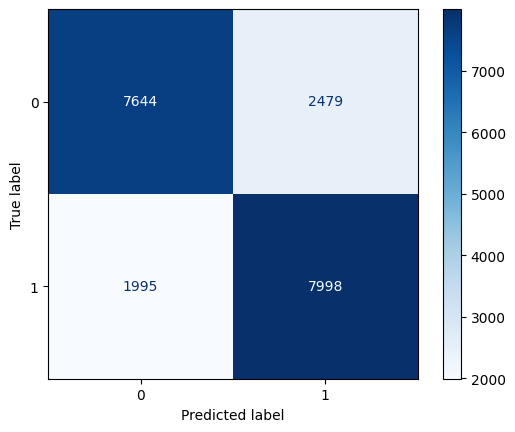

In [253]:
# Visualize Confusion Matrix        


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")


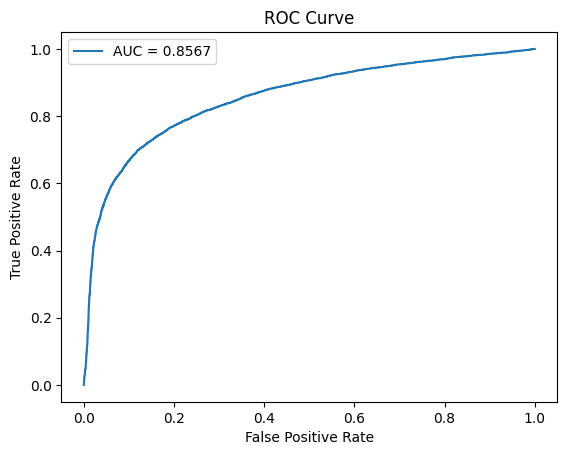

In [254]:
# roc curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_valid, y_pred_prob)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Logistic Regression:

Achieved 77.76% accuracy and AUC-ROC of 0.8567 on the validation set.
Hyperparameter tuning improved the model performance slightly, with C=0.1, penalty=l2, and solver=liblinear achieving the best AUC-ROC of 0.8575.

# Random Forest:
Ranked total_og_mou_8 and total_rech_amt_8 as the most important features for predicting the target outcome.

# General Observations:
The models perform well on both metrics (accuracy and AUC-ROC), indicating reliable predictions.
Logistic Regression offers interpretable coefficients, while Random Forest provides insights into feature importance.


# 7. Creating submission file

For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

In [166]:
sample = X_train.sample(5)  # random sample of 5 rows
print(sample.head())


          id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
54222  54222        109             0.0             0.0             0.0   
39760  39760        109             0.0             0.0             0.0   
48573  48573        109             0.0             0.0             0.0   
30120  30120        109             0.0             0.0             0.0   
65722  65722        109             0.0             0.0             0.0   

        arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  ...  \
54222  668.355  562.012  457.160        56.83        62.31  ...   
39760  246.850  191.210  213.427       186.38        84.24  ...   
48573  310.566  134.199  204.221        14.63         1.06  ...   
30120   19.313   14.530  291.825         1.61         1.56  ...   
65722  422.116  587.731  738.400        42.58       134.43  ...   

       date_of_last_rech_8_day  date_of_last_rech_data_6_year  \
54222                     25.0                         2014.0   
39760           

In [259]:
import pandas as pd

sample = pd.read_csv('/Users/sanket/Downloads/sample.csv')
print("Sample submission format:")
print(sample.head())

# Step 2: Preview the unseen test data
unseen = pd.read_csv('/Users/sanket/Downloads/test.csv')
print("Unseen test data:")
print(unseen.head())

# Step 3: Prepare the submission data
submission_data = unseen.set_index('id')[new_vars]
print("Submission data shape:", submission_data.shape)

# Step 4: Predict churn probabilities using the trained pipeline model
unseen['churn_probability'] = pipe.predict_proba(submission_data)[:, 1]  # Predict probabilities for class 1

# Step 5: final submission file
output = unseen[['id', 'churn_probability']]
print("Submission preview:")
print(output.head())

# Step 6: Save the output to a CSV file
output_filename = 'submission_file.csv'
output.to_csv(output_filename, index=False)
print(f"Submission file saved as {output_filename}")


Sample submission format:
      id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  0
3  70002                  0
4  70003                  0
Unseen test data:
      id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014          